# Churn Prediction Useing XGboost

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
dataset = pd.read_csv(r'Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,delhi,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,delhi,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,delhi,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,mumbai,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = dataset.iloc[:,3:-1].values
X

array([[619, 'delhi', 'Female', ..., 1, 1, 101348.88],
       [608, 'bangalore', 'Female', ..., 0, 1, 112542.58],
       [502, 'delhi', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'delhi', 'Female', ..., 0, 1, 42085.58],
       [772, 'mumbai', 'Male', ..., 1, 0, 92888.52],
       [792, 'delhi', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [5]:
y = dataset.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

# Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [7]:
print(X)

[[619 'delhi' 0 ... 1 1 101348.88]
 [608 'bangalore' 0 ... 0 1 112542.58]
 [502 'delhi' 0 ... 1 0 113931.57]
 ...
 [709 'delhi' 0 ... 0 1 42085.58]
 [772 'mumbai' 1 ... 1 0 92888.52]
 [792 'delhi' 0 ... 1 0 38190.78]]


## One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[1])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[0.0 1.0 0.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [0.0 1.0 0.0 ... 1 0 113931.57]
 ...
 [0.0 1.0 0.0 ... 0 1 42085.58]
 [0.0 0.0 1.0 ... 1 0 92888.52]
 [0.0 1.0 0.0 ... 1 0 38190.78]]


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
print(X)

[[0.0 1.0 0.0 ... 1 1 101348.88]
 [1.0 0.0 1.0 ... 0 1 112542.58]
 [0.0 1.0 0.0 ... 1 0 113931.57]
 ...
 [0.0 1.0 0.0 ... 0 1 42085.58]
 [1.0 0.0 0.0 ... 1 0 92888.52]
 [0.0 1.0 0.0 ... 1 0 38190.78]]


## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

## Training XGBoost on the Training set

In [14]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Predicting the Test set results

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

## Making the Confusion Matrix¶

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1492  103]
 [ 192  213]]


## Compute ROC curve and AUC

In [25]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test,y_pred)
roc_auc = auc (fpr,tpr)
fpr
roc_auc

0.7306745617090444

## compute accuracy

In [21]:
from sklearn.metrics import accuracy_score
Ac = accuracy_score (y_test,y_pred)
print(Ac)

0.8525


# # compute Bias and Varince

In [26]:
Bias = model.score(X_train,y_train)
print(Bias)

0.957625


In [28]:
Variance = model.score(X_test,y_test)
print(Variance)

0.8525


## Applying k-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score (estimator = model, X = X_train, y=y_train, cv =10)
print("Accurscies: {:.2f}%".format(accuracies.mean()*100))
print('Standar Deviation : {:.2f}%'.format(accuracies.std()*100))

Accurscies: 85.20%
Standar Deviation : 1.23%


## Plot the ROC curve

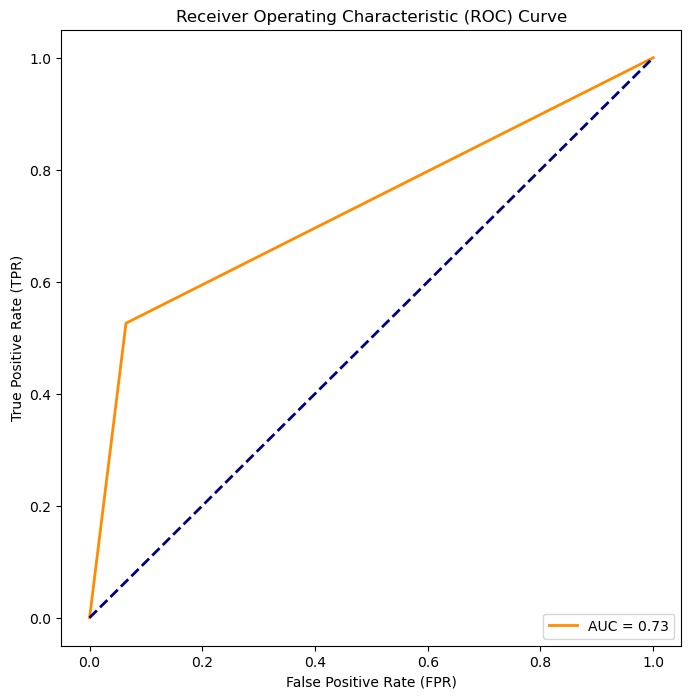

In [32]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()